In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import pairwise_distances

# Enable memory profiling to monitor memory usage
import memory_profiler

In [2]:
# Define a decorator for memory profiling
def profile(func):
    def wrapper(*args, **kwargs):
        # Run the function while monitoring memory usage
        mem_usage_before = memory_profiler.memory_usage()[0]
        result = func(*args, **kwargs)
        mem_usage_after = memory_profiler.memory_usage()[0]

        # Calculate memory usage
        mem_usage = mem_usage_after - mem_usage_before

        # Print memory usage
        print(f"Memory usage: {mem_usage} MB")
        return result

    return wrapper


In [3]:
# Define function for loading preprocessed data
@profile
def load_data():
    recipe_df = pd.read_csv('C:\\Users\\reeve\\OneDrive\\Desktop\\DSC-590\\preprocessed-data.csv')
    return recipe_df


In [4]:
# Define function for creating sparse matrix
@profile
def create_sparse_matrix(recipe_data):
    nutrition = recipe_data[['calories', 'fat', 'carbohydrates', 'protein']]
    nutrition_matrix = csr_matrix(nutrition)
    nutrition_matrix_dense = nutrition_matrix.toarray()
    return nutrition_matrix_dense

In [5]:
# Define function for computing similarity matrix
@profile
def compute_similarity_matrix(nutrition_matrix_dense):
    similarity_matrix = pairwise_distances(nutrition_matrix_dense, metric='hamming')
    return similarity_matrix

In [6]:

# Load preprocessed data
recipe_data = load_data()

# Create sparse matrix
nutrition_matrix_dense = create_sparse_matrix(recipe_data)

# Compute similarity matrix
similarity_matrix = compute_similarity_matrix(nutrition_matrix_dense)

Memory usage: 37.4453125 MB
Memory usage: 0.30859375 MB
Memory usage: 7.57421875 MB


Recipe Name: Polish Dill Pickle Soup
Image URL: https://images.media-allrecipes.com/userphotos/250x250/569448.jpg
Ingredients: beef neck bones^mixed vegetables^diced dill pickles^quarts water^diced potatoes^all-purpose flour^milk^salt to taste
Cooking Directions: {'directions': u'In a large pot, place neck bones, vegetables, and pickles. Add water. Cook over medium heat for 45 minutes.\nAdd potatoes; cook until soft, about 20 minutes.\nRemove neck bones. Increase heat to medium-high. Combine flour and milk in a small bowl, and gradually stir into soup. Continue stirring until mixture boils. Season to taste with salt.'}
Calories: 4
Fat: 1
Carbohydrates: 5
Protein: 7
---------------------------------------


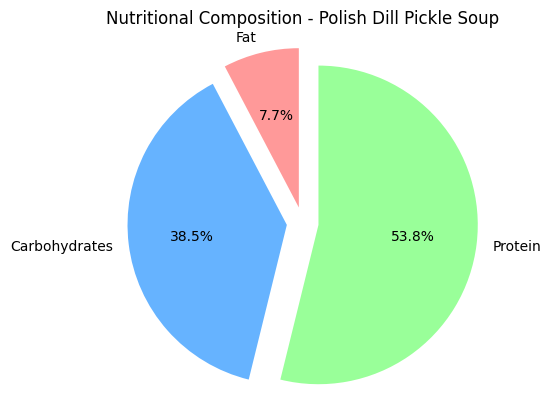

Recipe Name: Laurie's Tequila Marinade
Image URL: https://images.media-allrecipes.com/userphotos/720x405/3486464.jpg
Ingredients: tequila^Worcestershire sauce^teriyaki sauce^dried jalapeno pepper^black pepper^salt
Cooking Directions: {'directions': u'Prep\n15 m\nReady In\n15 m\nIn a blender, combine tequila, Worcestershire sauce, teriyaki sauce, dried pepper, black pepper and salt. Blend until smooth. Pour over your favorite cut of meat and marinate for 8 to 24 hours.'}
Calories: 4
Fat: 1
Carbohydrates: 3
Protein: 3
---------------------------------------


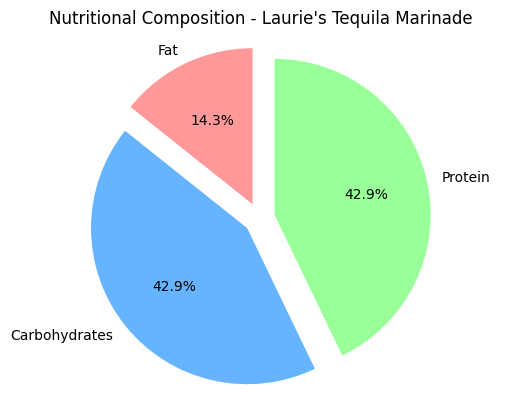

Recipe Name: Vibration Spaghetti Sauce
Image URL: https://images.media-allrecipes.com/userphotos/250x250/540891.jpg
Ingredients: olive oil^large onion^garlic^lean ground beef^dried chervil^dried basil^dried oregano^Italian seasoning^crushed red pepper flakes^seasoning salt^salt^soy sauce^red chile sauce^Worcestershire sauce^peeled tomatoes^tomato sauce^tomato paste^mushrooms drained^sliced black olives drained^bay leaves^instant coffee granules (optional)
Cooking Directions: {'directions': u"Prep\n30 m\nCook\n3 h\nReady In\n3 h 30 m\nIn a large saucepan, saute onion and garlic in oil until soft. Add ground beef and saute until pink colour is gone, stirring to break up large pieces. While beef is browning, add chervil, basil, oregano, Italian seasoning, red pepper, seasoning salt, salt, soy sauce, red chile sauce and Worcestershire sauce.\nAfter beef has browned, add canned tomatoes; simmer for 10 minutes. Spoon off any excess fat. Add tomato sauce and stir until well mixed. Spoon in to

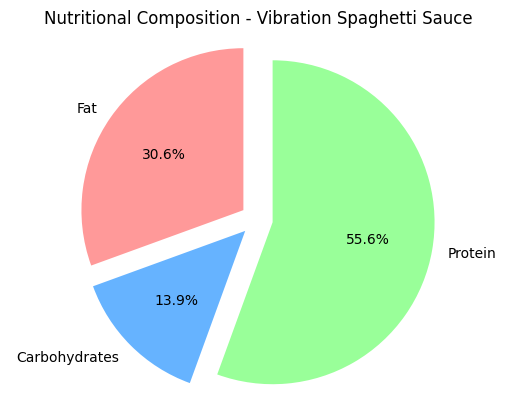

Recipe Name: Easy Southwestern Chicken Soup
Image URL: https://images.media-allrecipes.com/userphotos/720x405/1524031.jpg
Ingredients: chicken broth^black beans rinsed and drained^diced tomatoes with green chile peppers (such as RO*TEL®)^petite diced tomatoes^chunk white chicken^minced garlic^red pepper flakes^salt and ground black pepper to taste
Cooking Directions: {'directions': u'Prep\n15 m\nCook\n20 m\nReady In\n35 m\nStir chicken broth, black beans, diced tomatoes with green chile peppers, petite diced tomatoes, chicken, garlic, red pepper flakes, salt, and black pepper together in a large pot; bring to a simmer and cook until hot and flavors combine, about 20 minutes.'}
Calories: 6
Fat: 4
Carbohydrates: 5
Protein: 21
---------------------------------------


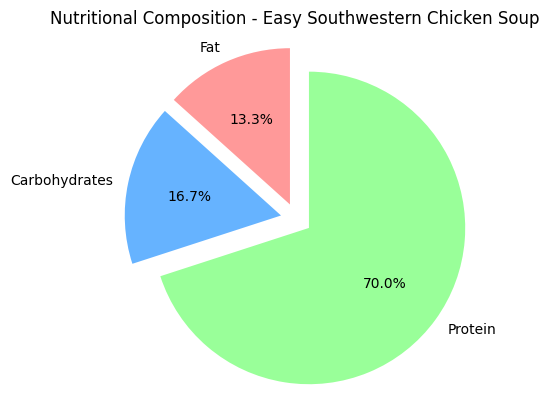

Recipe Name: Curry Chicken Casserole
Image URL: https://images.media-allrecipes.com/userphotos/720x405/1593361.jpg
Ingredients: broccoli florets^fresh green beans trimmed^cooked chicken breast^shredded Cheddar cheese^chicken broth^all-purpose flour^plain yogurt^fish sauce^lime juice^curry powder^salt and ground black pepper to taste^shredded Cheddar cheese
Cooking Directions: {'directions': u'Prep\n20 m\nCook\n45 m\nReady In\n1 h 5 m\nPlace a steamer insert into a saucepan and fill with water to just below the bottom of the steamer. Bring water to a boil. Add broccoli and green beans, cover, and steam until tender, 2 to 6 minutes.\nPreheat oven to 350 degrees F (175 degrees C).\nPlace broccoli and green beans in a 9x13-inch baking dish. Cover with chicken and 1 1/2 cups Cheddar cheese.\nHeat chicken broth in a saucepan over medium heat until almost boiling. Mix a small amount of broth with flour in a bowl to create a paste; whisk paste into remaining chicken broth until thickened. Stir

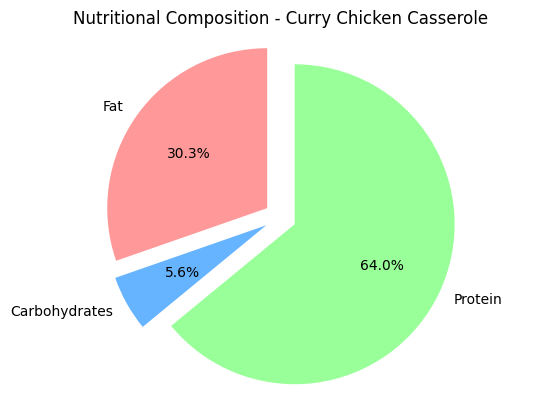

In [7]:
# Define function for recipe recommendation
def nutrition_recommender(recipe_id, N):
    recipe_id = int(recipe_id)
    # Check if the recipe_id exists in the DataFrame
    if recipe_id not in recipe_data['recipe_id'].values:
        print(f"Recipe ID '{recipe_id}' does not exist.")
        return

    # Get index of recipe
    idx = recipe_data.loc[recipe_data['recipe_id'] == recipe_id].index

    if len(idx) == 0:
        print(f"No recipe found with ID '{recipe_id}'.")
        return

    idx = idx[0]  # Use the first index if there are multiple matches

    # Compute similarity scores
    similarity_scores = similarity_matrix[idx]
    sorted_indices = np.argsort(similarity_scores)[:N]

    # Retrieve recommended recipes
    recommended_recipes = recipe_data.loc[sorted_indices]

    # Display recipe information for recommended recipes
    for i in range(N):
        recipe_name = recommended_recipes.iloc[i]['recipe_name']
        image_url = recommended_recipes.iloc[i]['image_url']
        ingredients_list = recommended_recipes.iloc[i]['ingredients']
        cooking_directions = recommended_recipes.iloc[i]['cooking_directions']

        # Get nutritional information
        calories = recommended_recipes.iloc[i]['calories']
        fat = recommended_recipes.iloc[i]['fat']
        carbohydrates = recommended_recipes.iloc[i]['carbohydrates']
        protein = recommended_recipes.iloc[i]['protein']

        print(f"Recipe Name: {recipe_name}")
        print(f"Image URL: {image_url}")
        print(f"Ingredients: {ingredients_list}")
        print(f"Cooking Directions: {cooking_directions}")
        print(f"Calories: {calories}")
        print(f"Fat: {fat}")
        print(f"Carbohydrates: {carbohydrates}")
        print(f"Protein: {protein}")
        print("---------------------------------------")

        # Calculate percentages
        total_calories = fat + carbohydrates + protein
        fat_percentage = (fat / total_calories) * 100
        carbohydrates_percentage = (carbohydrates / total_calories) * 100
        protein_percentage = (protein / total_calories) * 100

        # Create a pie plot
        labels = ['Fat', 'Carbohydrates', 'Protein']
        sizes = [fat_percentage, carbohydrates_percentage, protein_percentage]
        colors = ['#ff9999', '#66b3ff', '#99ff99']
        explode = (0.1, 0.1, 0.1)  # explode the slices for emphasis

        plt.figure()
        plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', startangle=90)
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
        plt.title(f"Nutritional Composition - {recipe_name}")

        # Display image for recommended recipes
        response = urllib.request.urlopen(image_url)
        img = Image.open(response)
        img.show()

        # Show the pie plot
        plt.show()

# Example usage
nutrition_recommender('13151', 5)


In [11]:
recipe_data.index

RangeIndex(start=0, stop=995, step=1)

In [19]:
print(recipe_data['recipe_id'].values)

[222388 240488 218939  87211 245714 218545  20453 244856  22402 258163
  23658 244786 260453 103305 261609  46139  26668 185816  79814  25507
 238886 235633  50908  73910 236920 235757   8778 217969 233910 231459
 233874 133604  55420 231825 142456 140407  26623  22681  99892 219884
  25930 241535 239547 244979 219754  20900 242492 125366  23613  63351
  16246 152220 212912 213650  17178 130444 231412 233443   8987 191159
 229331  53650 214631   8657 216704 236517   8733 115703 214755 215053
   9035 237375  31870  12414 216090 230314  57002 213268 230270  28011
 245367 238325 219208  85757  20020 262071  23187 143234 143350  25174
 156795  17813  76164  14664 217281 231105 233030  14700 172958  34513
 256881  50384 230197  11730 254700  16881 236164 254664 154468 109639
 193863 162236  60685  81576  46819 239298 241146  18843  80648  25293
 219327 182157  41878  18793 220685  23260  64893 141182  60708 247038
  87910 127565 219062  86736  23041 245069 180327  21174 222591 143296
 21910

In [22]:
print(recipe_data.columns)


Index(['recipe_id', 'recipe_name', 'aver_rate', 'image_url', 'review_nums',
       'ingredients', 'cooking_directions', 'reviews', 'calories', 'fat',
       'carbohydrates', 'protein'],
      dtype='object')


In [13]:
import pandas as pd

import ast  # used to convert the string representation of the dictionary to a dictionary object

from sklearn.preprocessing import normalize

recipe_data = pd.read_csv("C:\\capstone project\\data\\raw-data_recipe_1000.csv")


# aver_rate rounded to 2 decimal places
def average_rate(col):
    return f'{col:.2f}'


recipe_data.aver_rate = recipe_data.aver_rate.apply(average_rate)
# aver_rate has to converted from object to float
recipe_data.aver_rate = recipe_data.aver_rate.astype(float)

"""This code is converting a column of strings in a pandas DataFrame into a list of dictionaries,
where each dictionary contains the nutritional information for a specific recipe."""
list_dictionaries = []

for row in recipe_data.nutritions:
    list_dictionaries.append(ast.literal_eval(row))

# extract selected nutrition values
calories_list = []
fat_list = []
carbohydrates_list = []
protein_list = []

for x in range(len(list_dictionaries)):
    calories_list.append(list_dictionaries[x]['calories']['displayValue'])
    fat_list.append(list_dictionaries[x]['fat']['displayValue'])
    carbohydrates_list.append(list_dictionaries[x]['carbohydrates']['displayValue'])
    protein_list.append(list_dictionaries[x]['protein']['displayValue'])

# grouping the data
data = {'calories': calories_list, 'fat': fat_list, 'carbohydrates': carbohydrates_list,
        'protein': protein_list}

df = pd.DataFrame(data)
df.index = recipe_data['recipe_id']
df = df.dropna()


def text_cleaning(cols):
    if cols == '< 1':
        return 1
    else:
        return cols


for col in df.columns:
    df[col] = df[col].apply(text_cleaning)
df = df.apply(pd.to_numeric)

# normalized nutrition data
df_normalized = pd.DataFrame(normalize(df, axis=0))
df_normalized.columns = df.columns
df_normalized.index = df.index

# final dataframe
recipe_final = pd.merge(recipe_data, df, on='recipe_id')
recipe_final = recipe_final.drop(columns=['nutritions'])
recipe_final.head()


,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,cooking_directions,reviews,calories,fat,carbohydrates,protein
0,222388,Homemade Bacon,5.00,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,{'directions': u'Prep\n5 m\nCook\n2 h 45 m\nRe...,"{8542392: {'rating': 5, 'followersCount': 11, ...",308,23.6,1.8,21.0
1,240488,"Pork Loin, Apples, and Sauerkraut",4.76,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{3574785: {'rating': 5, 'followersCount': 0, '...",372,11.7,32.1,36.4
2,218939,Foolproof Rosemary Chicken Wings,4.57,https://images.media-allrecipes.com/userphotos...,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{'directions': u""Prep\n20 m\nCook\n40 m\nReady...","{13774946: {'rating': 5, 'followersCount': 0, ...",335,23.6,6.1,23.9
3,87211,Chicken Pesto Paninis,4.62,https://images.media-allrecipes.com/userphotos...,163,focaccia bread quartered^prepared basil pesto^...,{'directions': u'Prep\n15 m\nCook\n5 m\nReady ...,"{1563136: {'rating': 5, 'followersCount': 0, '...",641,29.4,60.9,32.4
4,245714,Potato Bacon Pizza,4.50,https://images.media-allrecipes.com/userphotos...,2,red potatoes^strips bacon^Sauce:^heavy whippin...,{'directions': u'Prep\n20 m\nCook\n45 m\nReady...,"{2945555: {'rating': 5, 'followersCount': 6690...",163,7.6,16.5,7.1


In [10]:


recipe_data = pd.read_csv("C:\\capstone project\\data\\raw-data_recipe_1000.csv")


# aver_rate rounded to 2 decimal places
def average_rate(col):
    return f'{col:.2f}'


recipe_data.aver_rate = recipe_data.aver_rate.apply(average_rate)
# aver_rate has to converted from object to float
recipe_data.aver_rate = recipe_data.aver_rate.astype(float)

"""This code is converting a column of strings in a pandas DataFrame into a list of dictionaries,
where each dictionary contains the nutritional information for a specific recipe."""
list_dictionaries = []

for row in recipe_data.nutritions:
    list_dictionaries.append(ast.literal_eval(row))

# extract selected nutrition values
calories_list = []
fat_list = []
carbohydrates_list = []
protein_list = []

print(calories_list)

[]
